**LIMPIEZA Y EXPLORACION**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSVTWx4NXKh5elbiOzaXZxvYw0fY54gnu_ziuohQLaushR4ahWcQJ0z06RzJmAJp9lHCwhkZUFKbDUs/pub?output=csv'
data = pd.read_csv(url)
data.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [3]:
print(data.duplicated().sum())
print(data.isna().sum())

0
nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64


In [4]:
data['Athlete ID'].nunique() #Coincide con la informacion brindad, tenemos data de 74 atletas

74

In [5]:
data['injury'].unique() #Lesio, 0(no hay lesion), 1(hay lesion)

array([0, 1])

In [6]:
data['injury'].value_counts() #total 42766
#lesionados = 583=(1.3%)
#no lesionados = 42183=  (98.6%)

,count
injury,
0,42183
1,583


In [7]:
data['nr. sessions'].value_counts()

,count
nr. sessions,
1.0,27103
0.0,11476
2.0,4187


In [8]:
data.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,...,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000,42766.000000
mean,0.829561,7.038187,0.691381,0.579930,0.073016,0.116237,0.163492,0.247788,0.349802,0.195898,...,0.580347,0.072595,0.116120,0.162308,0.247550,0.349503,0.196224,34.550858,0.013632,1228.039892
std,0.580696,7.473216,2.317657,1.811938,0.483480,0.326010,0.549664,0.257262,0.368300,0.190321,...,1.814538,0.483691,0.326016,0.554031,0.256718,0.368042,0.190568,19.050033,0.115960,807.021168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,20.000000,0.000000,436.000000
50%,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.160000,...,0.000000,0.000000,0.000000,0.000000,0.160000,0.260000,0.170000,34.000000,0.000000,1256.000000
75%,1.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.440000,0.720000,0.300000,50.000000,0.000000,1913.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


**VALORES A ELIMINAR = 0**

In [9]:
#Tengo elementos donde su total km recorridos es 0, es algo raro e inusual
# a su vez me percato que el percentil del 25% abarca esta cantidad de numeros 0
#examinare para posiblemente eliminarlos
cero = data.drop(['Athlete ID', 'injury', 'Date', 'nr. sessions'], axis=1)
ceros = cero[(cero <= 0).all(axis=1)]

# Mostramos el resultado
ceros

,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,...,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6
146,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
147,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
148,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
149,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
150,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42279,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42590,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42591,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
42592,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01


In [10]:
ceros.describe() # Me percato que son 2282 valores con 0 y menores que 0

,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,nr. sessions.1,...,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6
count,2282.0,2282.0,2282.0,2282.0,2282.0,2282.0,2282.00,2282.00,2282.00,2282.0,...,2282.0,2282.0,2282.0,2282.0,2282.0,2282.0,2282.0,2282.00,2282.00,2282.00
mean,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
std,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
min,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
25%,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
50%,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
75%,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01
max,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01


In [11]:
indices_eliminar=  ceros.index
eliminar = data.loc[indices_eliminar]
eliminar['injury'].value_counts()
#felizmente son pocos los lesionados que abarco estos valores

,count
injury,
0,2277
1,5


In [12]:
#ELIMINAR VALORES
df = data.drop(indices_eliminar)
df

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.00,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.00,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.00,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647


In [13]:
df.describe()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
count,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,...,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000
mean,0.876322,7.434915,0.730353,0.612620,0.077132,0.122789,0.172707,0.262319,0.370083,0.207504,...,0.613059,0.076687,0.122666,0.171457,0.262067,0.369767,0.207848,34.650973,0.014277,1240.213418
std,0.561460,7.486482,2.376102,1.856922,0.496601,0.333870,0.563533,0.256821,0.368215,0.189049,...,1.859595,0.496821,0.333879,0.568053,0.256260,0.367960,0.189291,19.023363,0.118633,810.745634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,...,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,-0.010000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,436.000000
50%,1.000000,6.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.430000,0.170000,...,0.000000,0.000000,0.000000,0.000000,0.170000,0.420000,0.170000,34.000000,0.000000,1285.000000
75%,1.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,0.730000,0.310000,...,0.000000,0.000000,0.000000,0.000000,0.460000,0.730000,0.320000,50.000000,0.000000,1927.000000
max,2.000000,55.900000,42.200000,48.000000,40.000000,2.000000,10.220000,1.000000,1.000000,1.000000,...,48.000000,40.000000,2.000000,20.000000,1.000000,1.000000,1.000000,73.000000,1.000000,2673.000000


In [14]:
df['injury'].value_counts()
#No lesionados = 39906(98.5%)
#Lesionados = 578(%1.4)

,count
injury,
0,39906
1,578


*VALORES LIMPIOS:*

    -Me percate que existe unos datos donde la mayoria de sus datos son y menores que 0
    -Claramente esto no lleva ninguna coherencia
    -Luego de la data filtrada me percato que solo 5 lesionados cumplen con todos los datos en 0, lo cual es imposible, ya que alguien sin practicar nada es imposible que se lesione


**GRAFICOS CON DATOS LIMPIOS**

---



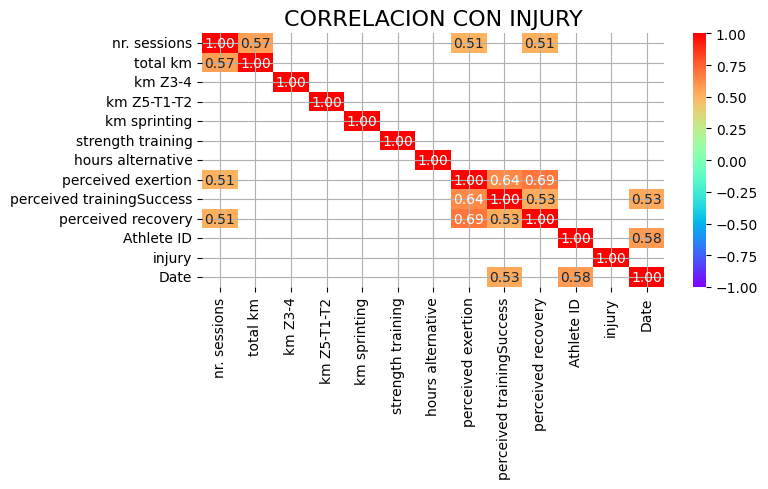


No existe correlaciones con el target = Injuri


In [15]:
#Me percato que la misma cantidad de pruebas se repiten 7 veces
unico = df[['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery','Athlete ID',
       'injury', 'Date']]
plt.figure(dpi=100, figsize=(8,5))
corr = unico.corr()
mask = np.abs(corr) < 0.5
sns.heatmap(corr, mask=mask,annot=True, cmap='rainbow', fmt=".2f",vmin=-1, vmax=1)
plt.title('CORRELACION CON INJURY', fontsize=16)
plt.tight_layout()
plt.grid(True)
plt.show()
print('\nNo existe correlaciones con el target = Injuri')

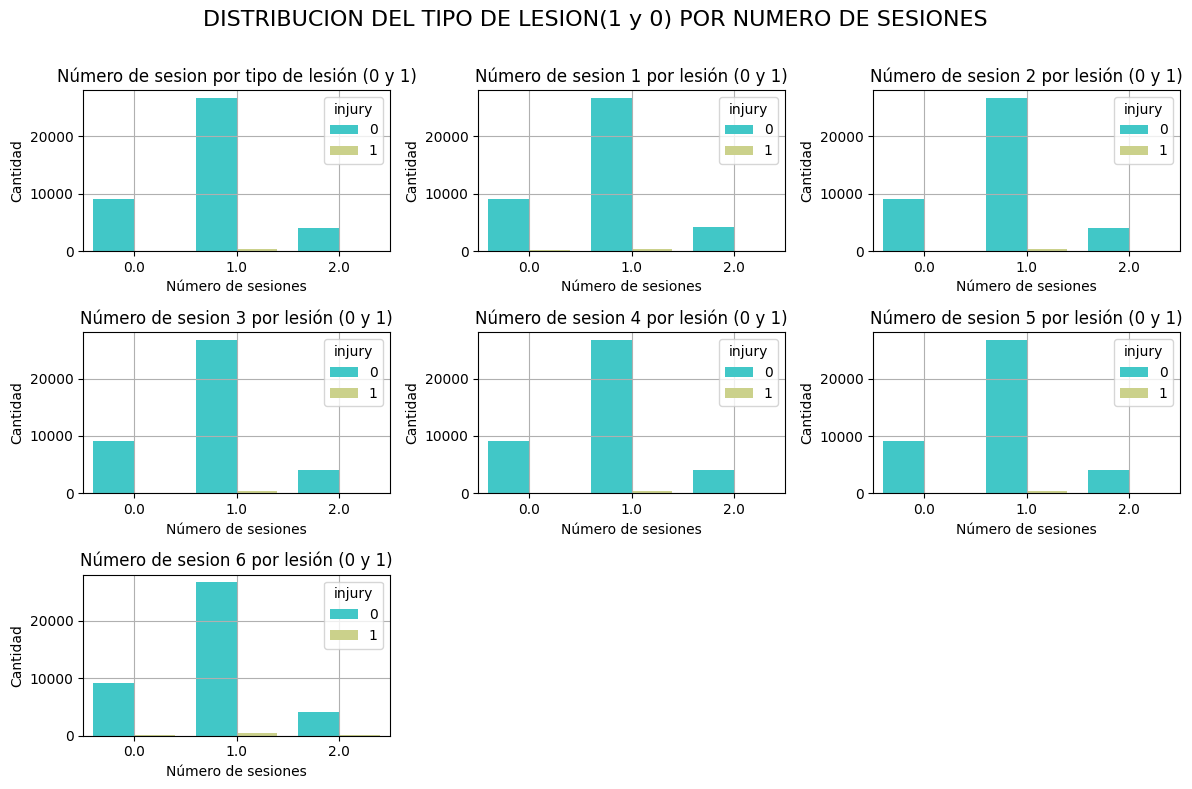


No existe la relacion de que a menos sessiones, mas probalidades de no lesionarse


In [16]:
plt.figure(dpi=100, figsize=(12,8))
plt.suptitle('DISTRIBUCION DEL TIPO DE LESION(1 y 0) POR NUMERO DE SESIONES\n', fontsize=16)

plt.subplot(3,3,1)
sns.countplot(data=df, x='nr. sessions', hue='injury', palette='rainbow')
plt.title('Número de sesion por tipo de lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,2)
sns.countplot(data=df, x='nr. sessions.1', hue='injury', palette='rainbow')
plt.title('Número de sesion 1 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,3)
sns.countplot(data=df, x='nr. sessions.2', hue='injury', palette='rainbow')
plt.title('Número de sesion 2 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,4)
sns.countplot(data=df, x='nr. sessions.3', hue='injury', palette='rainbow')
plt.title('Número de sesion 3 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,5)
sns.countplot(data=df, x='nr. sessions.4', hue='injury', palette='rainbow')
plt.title('Número de sesion 4 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,6)
sns.countplot(data=df, x='nr. sessions.5', hue='injury', palette='rainbow')
plt.title('Número de sesion 5 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.subplot(3,3,7)
sns.countplot(data=df, x='nr. sessions.6', hue='injury', palette='rainbow')
plt.title('Número de sesion 6 por lesión (0 y 1)', fontsize=12)
plt.grid(True)
plt.xlabel('Número de sesiones', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)

plt.tight_layout()
plt.show()
print('\nNo existe la relacion de que a menos sessiones, mas probalidades de no lesionarse')

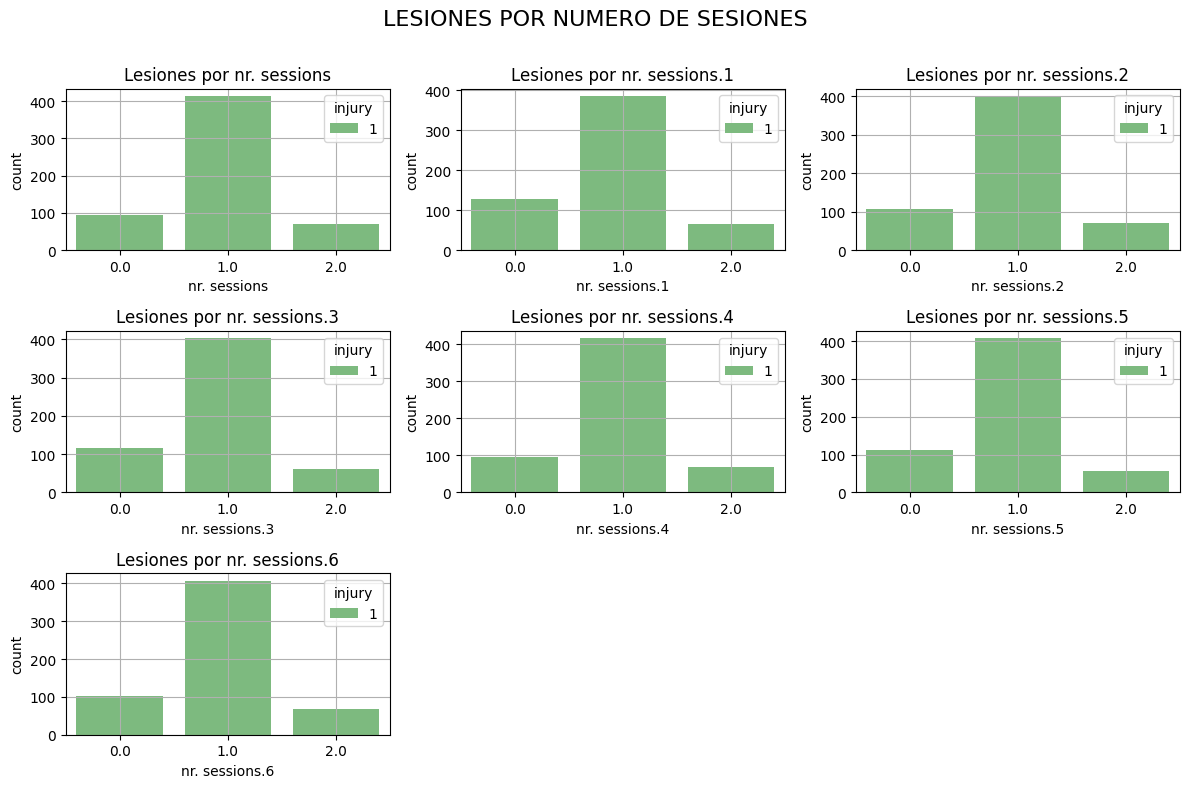


La session que tuvo menos lesionados fue la numero 1 en todos los numeros de sessiones


In [17]:
lesiones = df[df['injury'] == 1][['nr. sessions','nr. sessions.1','nr. sessions.2',
                                  'nr. sessions.3', 'nr. sessions.4',
                                  'nr. sessions.5', 'nr. sessions.6', 'injury']]

sesiones_columns = ['nr. sessions', 'nr. sessions.1', 'nr. sessions.2',
                    'nr. sessions.3', 'nr. sessions.4', 'nr. sessions.5',
                    'nr. sessions.6']
n=1
plt.figure(dpi=100, figsize=(12,8))
for columna in sesiones_columns:
    plt.subplot(3, 3, n)  # Crear un subplot de 4 filas y 2 columnas (ajusta según tus necesidades)
    sns.countplot(data=lesiones, x=columna, hue='injury', palette='Greens')  # Crear el gráfico para cada columna
    plt.title(f'Lesiones por {columna}', fontsize=12)  # Título para cada subplot
    plt.grid(True)
    n += 1  # Incrementar el número de subplots

plt.suptitle('LESIONES POR NUMERO DE SESIONES\n', fontsize=16)
plt.tight_layout()
plt.show()
print('\nLa session que tuvo menos lesionados fue la numero 1 en todos los numeros de sessiones')

In [18]:
l = df[['nr. sessions', 'nr. sessions.1', 'nr. sessions.2', 'nr. sessions.3', 'nr. sessions.4', 'nr. sessions.5', 'nr. sessions.6']]
l.describe()

,nr. sessions,nr. sessions.1,nr. sessions.2,nr. sessions.3,nr. sessions.4,nr. sessions.5,nr. sessions.6
count,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000,40484.000000
mean,0.876322,0.875729,0.876322,0.876025,0.876643,0.875482,0.875531
std,0.561460,0.562076,0.561504,0.561306,0.561024,0.560437,0.560713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**TARGET**

---



In [19]:
ls = df[df['injury']==1]
nl = df[df['injury']==0]

In [20]:
df['injury'].value_counts() #claramente esta desbalanceado

,count
injury,
0,39906
1,578


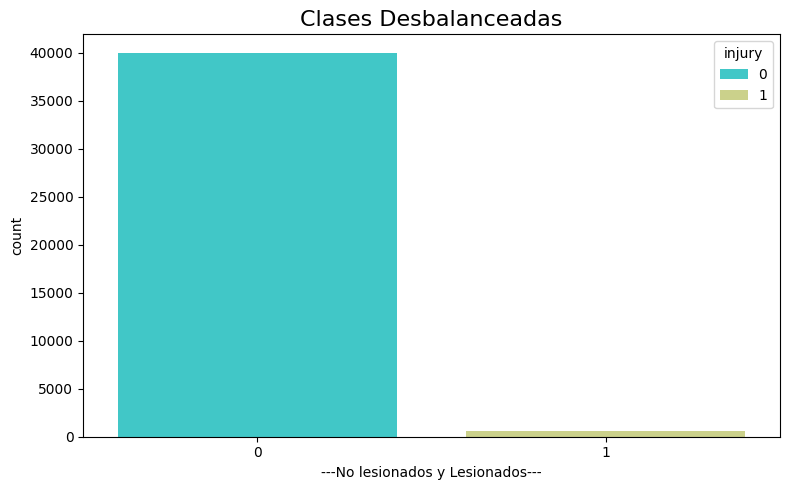


Claramente se observa el target desbalanceados


In [21]:
#Graficar las clases desbalanceadas
plt.figure(figsize=(8, 5), dpi=100)
sns.countplot(data=df, x= 'injury', hue='injury',palette='rainbow')
plt.xlabel('---No lesionados y Lesionados---')
plt.title('Clases Desbalanceadas', fontsize=16)
plt.tight_layout()
plt.show()
print('\nClaramente se observa el target desbalanceados')

In [22]:
#BALANCEAR CON LA CLASE MINORISTA
from imblearn.under_sampling import RandomUnderSampler

# Separar variables
X = df.drop('injury', axis=1)
y = df['injury']

# Aplicar el submuestreo
minorista = RandomUnderSampler(sampling_strategy='majority')
X_min, y_min = minorista.fit_resample(X, y)
print(y_min.value_counts())

injury
0    578
1    578
Name: count, dtype: int64


In [23]:
#BALANCEAR CON LA CLASE MAYORISTA
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE
mayorista = SMOTE(sampling_strategy='auto', random_state=42)
X_max, y_max = mayorista.fit_resample(X, y)

# Mostrar balance
print(y_max.value_counts())

injury
0    39906
1    39906
Name: count, dtype: int64


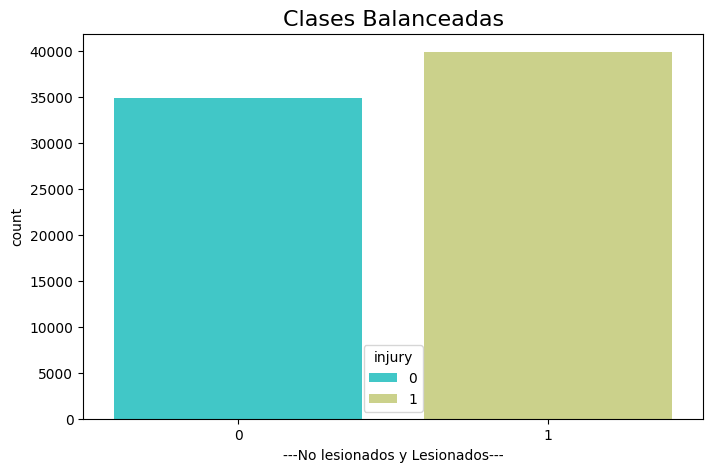


 injury
1    39891
0    34897
Name: count, dtype: int64


In [24]:
#COMBINAR LAS 2 CLASES
from imblearn.combine import SMOTEENN

# Aplicar la combinación
combinacion = SMOTEENN(random_state=42)
X_res, y_res = combinacion.fit_resample(X, y)

#converti el y_res en df
df_y = pd.DataFrame(y_res, columns=['injury'])
#graficar mi balanceo
plt.figure(figsize=(8, 5), dpi=100)
sns.countplot(data=df_y, x= 'injury', hue='injury',palette='rainbow')
plt.xlabel('---No lesionados y Lesionados---')
plt.title('Clases Balanceadas', fontsize=16)
plt.show()
# Mostrar balance
print('\n',y_res.value_counts())

**PREPROCESO**

---



In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#transformar varlores numericos
"""numeros = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scalr', StandardScaler())
])

#Preprocesar valores
preproceso_bl = ColumnTransformer(
    transformers=[
        ('num', numeros, X_res)
    ],
    remainder='passthrough',
    n_jobs=-1
)

preproceso_bl"""

"numeros = Pipeline(steps=[\n    ('imputer', SimpleImputer(strategy='most_frequent')),\n    ('scalr', StandardScaler())\n])\n\n#Preprocesar valores\npreproceso_bl = ColumnTransformer(\n    transformers=[\n        ('num', numeros, X_res)\n    ],\n    remainder='passthrough',\n    n_jobs=-1\n)\n\npreproceso_bl"

In [26]:
X_minn = X_min.select_dtypes(include=['float64', 'int']).columns

In [27]:
numeros = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scalr', StandardScaler())
])

preproceso = ColumnTransformer(
    transformers=[
        ('num', numeros, X_minn)
    ],
    remainder='passthrough',
    n_jobs=-1
)
preproceso

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scalr', StandardScaler())]),
                                 Index(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2', 'km sprinting',
       'strength training', 'hours alternative', 'perceived exertion',
       'perceived trainingSuccess', 'perceived recovery', 'nr. sess...
       'total km.5', 'km Z3-4.5', 'km Z5-T1-T2.5', 'km sprinting.5',
       'strength training.5', 'hours alternative.5', 'perceived exertion.5',
       'perceived trainingSuccess.5', 'perceived recovery.5', 'nr. sessions.6',
       'total km.6', 'km Z3-4.6', 'km Z5-T1-T2.6', 'km sprinting.6',
       'strength training.6', 'hours alternative.6', 'perceived exertion.6',
       'perceived trainingSuccess.6', 'perceived recovery.6', 'Athlete ID',
       'Date'],
      dtype='object'))])

In [28]:
#DIVISION DEL CONJUNTO DE DATOS
#X_frac = X_res.sample(frac=0.3)
#y_frac = y_res.sample(frac=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X_frac,y_frac, test_size=0.3, random_state=42)

In [29]:
#DIVISION DEL CONJUNTO DE DATOS
#X_frac = X_min.sample(frac=0.3)
#y_frac = y_min.sample(frac=0.3)
#X_train, X_test, y_train, y_test = train_test_split(X_min,y_min, test_size=0.3, random_state=42)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_min, y_min, test_size=0.3, random_state=42)

In [31]:
!pip install lazypredict

In [32]:
from lazypredict.Supervised import LazyClassifier
lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
modelo, prediccion = lazy.fit(X_train, X_test, y_train, y_test)
m = pd.DataFrame(modelo)
m.head(5)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 28/29 [00:12<00:01,  1.16s/it]

[LightGBM] [Info] Number of positive: 413, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3150
[LightGBM] [Info] Number of data points in the train set: 809, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510507 -> initscore=0.042033
[LightGBM] [Info] Start training from score 0.042033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:13<00:00,  2.23it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.61,0.61,0.61,0.61,0.68
XGBClassifier,0.61,0.61,0.61,0.61,4.59
RandomForestClassifier,0.61,0.61,0.61,0.60,0.77
BaggingClassifier,0.61,0.60,0.60,0.60,0.59
DecisionTreeClassifier,0.60,0.60,0.60,0.60,0.25


**MODELOS**

---



In [33]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

*XGB*

METRICAS DE EVALUACION MODELO XGB:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       182
           1       0.58      0.65      0.61       165

    accuracy                           0.61       347
   macro avg       0.61      0.61      0.61       347
weighted avg       0.61      0.61      0.61       347



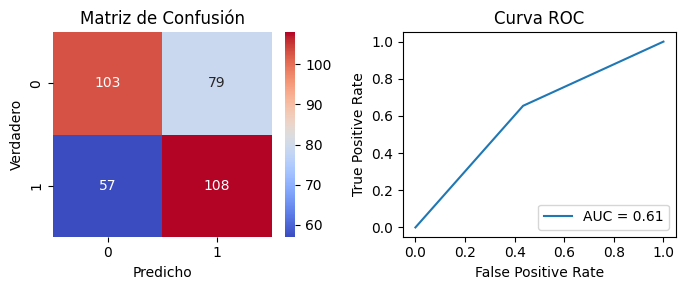


PRECISION: 63% de los lesionados, tiene mayor precision al predecir no  lesionados con 70%.
RECALL: 71% lesionados. Aumenta en la prediccion de los valores de los lesionados, valor muy interesante
F1-SCORE: 67%=lesioandos, 67%=no lesionados. Equilibrio equitativo en mi target
ACCURACY: De los 347 datos evaluados, el modelo muestra un  66% de exactitud
--MATRIZ DE CONFUSION--
El modelo tiene un número dec asi el 50% de falsos positivos y  mas del 50% en falsos negativos
Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable
--CURVA ROC--
AUC: El modelo tiene un rendimiento medianamente superior al de un modelo aleatorio, cuyo AUC sería 0.5.
Esto indica que el modelo tiene una clasificacion media, necesita mejoraas

CONCLUSIONES: El modelo XGB, parece tener un rendimiento medio, la muestra de datos de lesionados me parece muy pequeña


In [34]:
modelo_xgb = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', XGBClassifier())
])
#entrenar
modelo_xgb.fit(X_train, y_train)
#predicciones
y_xgb=modelo_xgb.predict(X_test)
#Evaluar modelo
exactitud = accuracy_score(y_test, y_xgb)
#Reporte de clasificacion
reporte_xgb = classification_report(y_test, y_xgb)
print('METRICAS DE EVALUACION MODELO XGB:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_xgb)
#Matrix de confusion y curva roc
matrix_xgb = confusion_matrix(y_test, y_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_xgb)
roc_auc = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_xgb, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()
#======================================================================
print('\nPRECISION: 63% de los lesionados, tiene mayor precision al predecir no  lesionados con 70%.')
print('RECALL: 71% lesionados. Aumenta en la prediccion de los valores de los lesionados, valor muy interesante')
print('F1-SCORE: 67%=lesioandos, 67%=no lesionados. Equilibrio equitativo en mi target')
print('ACCURACY: De los 347 datos evaluados, el modelo muestra un  66% de exactitud')
print('--MATRIZ DE CONFUSION--')
print('El modelo tiene un número dec asi el 50% de falsos positivos y  mas del 50% en falsos negativos')
print('Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable')
print('--CURVA ROC--')
print('AUC: El modelo tiene un rendimiento medianamente superior al de un modelo aleatorio, cuyo AUC sería 0.5.')
print('Esto indica que el modelo tiene una clasificacion media, necesita mejoraas')
print('\nCONCLUSIONES: El modelo XGB, parece tener un rendimiento medio, la muestra de datos de lesionados me parece muy pequeña')

*RANFOM FOREST*

METRICAS DE EVALUACION MODELO RANDOM-FOREST:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.66      0.52      0.58       182
           1       0.57      0.70      0.63       165

    accuracy                           0.61       347
   macro avg       0.61      0.61      0.60       347
weighted avg       0.62      0.61      0.60       347



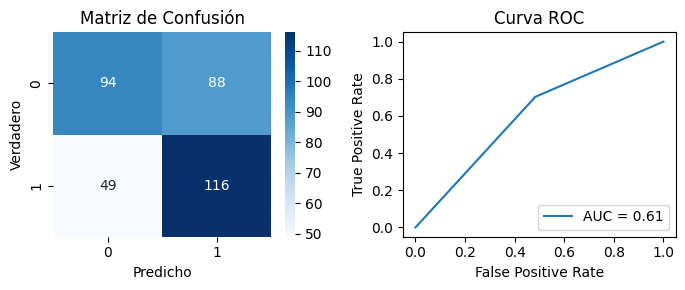


PRECISION: 62% de los lesionados, tiene mayor precision al predecir no  lesionados con 70%.
RECALL: 72% lesionados. Aumenta en la prediccion de los valores de los lesionados, menor que el modelo XGB
F1-SCORE: 64%=lesioandos, 64%=no lesionados. Equilibrio equitativo en mi target, pero, modelo superior 
ACCURACY: De los 347 datos evaluados, el modelo muestra un  65% de exactitud
--MATRIZ DE CONFUSION--
El modelo tiene un número de casi el 50% de falsos positivos y  mas del 50% en falsos negativos
Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable
--CURVA ROC--
AUC: El modelo tiene un rendimiento medianamente superior al de un modelo aleatorio, cuyo AUC sería 0.5.
Esto indica que el modelo tiene una clasificacion media baja, necesita mejoraas

CONCLUSIONES:
El modelo RANDOM-FOREST, parece tener un rendimiento medio, la muestra de datos de lesionados me parece muy pequeña
 -Accuracy medio menor que XGB pero superio al LGB
 -Precis

In [35]:
modelo_r = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', RandomForestClassifier(random_state=42))
])
#entrenar
modelo_r.fit(X_train, y_train)
#prediccion
y_random = modelo_r.predict(X_test)

#METRICAS DE EVALUACION
reporte_random = classification_report(y_test, y_random)
matrix_random = confusion_matrix(y_test, y_random)
fpr, tpr, thresholds = roc_curve(y_test, y_random)
roc_auc_random = auc(fpr, tpr)

#GRAFICOS
print('METRICAS DE EVALUACION MODELO RANDOM-FOREST:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_random)
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_random, annot=True, cmap='Blues', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_random)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

#CONCLUSIONES
#======================================================================
print('\nPRECISION: 62% de los lesionados, tiene mayor precision al predecir no  lesionados con 70%.')
print('RECALL: 72% lesionados. Aumenta en la prediccion de los valores de los lesionados, menor que el modelo XGB')
print('F1-SCORE: 64%=lesioandos, 64%=no lesionados. Equilibrio equitativo en mi target, pero, modelo superior ')
print('ACCURACY: De los 347 datos evaluados, el modelo muestra un  65% de exactitud')
print('--MATRIZ DE CONFUSION--')
print('El modelo tiene un número de casi el 50% de falsos positivos y  mas del 50% en falsos negativos')
print('Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable')
print('--CURVA ROC--')
print('AUC: El modelo tiene un rendimiento medianamente superior al de un modelo aleatorio, cuyo AUC sería 0.5.')
print('Esto indica que el modelo tiene una clasificacion media baja, necesita mejoraas')
print('\nCONCLUSIONES:')
print('El modelo RANDOM-FOREST, parece tener un rendimiento medio, la muestra de datos de lesionados me parece muy pequeña')
print(' -Accuracy medio menor que XGB pero superio al LGB')
print(' -Precision Superior al LGB pero menor que XGB')
print(' -Recall el mejor modelo en esta metrica')
print(' -f1 el mejor modelo en esta metrica')

*LGB*

METRICAS DE EVALUACION MODELO XGB:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       182
           1       0.56      0.64      0.59       165

    accuracy                           0.59       347
   macro avg       0.59      0.59      0.59       347
weighted avg       0.59      0.59      0.59       347



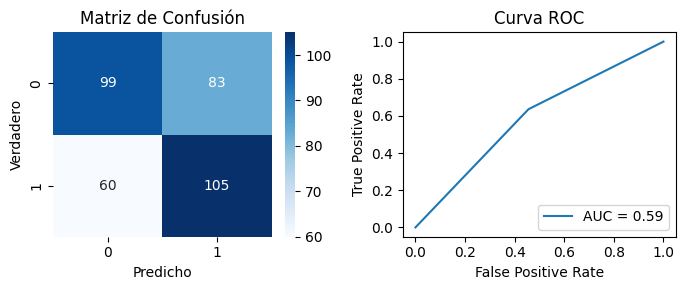


PRECISION: 60% de los lesionados, tiene mayor precision al predecir no  lesionados con 67%.
RECALL: 67% lesionados. Aumenta en la prediccion de los valores de los lesionados, menor que el modelo XGB
F1-SCORE: 63%=lesioandos, 63%=no lesionados. Equilibrio equitativo en mi target, pero, menor que el modelo XGB
ACCURACY: De los 347 datos evaluados, el modelo muestra un  63% de exactitud
--MATRIZ DE CONFUSION--
El modelo tiene un número de casi el 50% de falsos positivos y  mas del 50% en falsos negativos
Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable
--CURVA ROC--
AUC: El modelo tiene un rendimiento medianamente bajo superioral de un modelo aleatorio, cuyo AUC sería 0.5.
Esto indica que el modelo tiene una clasificacion media baja, necesita mejoraas

CONCLUSIONES:
El modelo XGB, parece tener un rendimiento medio bajo, menor al modelo XGB. la muestra de datos de lesionados me parece muy pequeña
 -Precision menor que XGB
 -Reca

In [36]:
modelo_lgb = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', lgb.LGBMClassifier(verbosity=-1))
])
#entrenar
modelo_lgb.fit(X_train, y_train)
#predicciones
y_lgb=modelo_lgb.predict(X_test)

#METRICAS DE EVALUACION
reporte_lgb = classification_report(y_test, y_lgb)
matrix_lgb = confusion_matrix(y_test, y_lgb)
fpr, tpr, thresholds = roc_curve(y_test, y_lgb)
roc_auc_lgb = auc(fpr, tpr)

#GRAFICOS
print('METRICAS DE EVALUACION MODELO XGB:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_lgb)
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_lgb, annot=True, cmap='Blues', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_lgb)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

#CONCLUSIONES
#======================================================================
print('\nPRECISION: 60% de los lesionados, tiene mayor precision al predecir no  lesionados con 67%.')
print('RECALL: 67% lesionados. Aumenta en la prediccion de los valores de los lesionados, menor que el modelo XGB')
print('F1-SCORE: 63%=lesioandos, 63%=no lesionados. Equilibrio equitativo en mi target, pero, menor que el modelo XGB')
print('ACCURACY: De los 347 datos evaluados, el modelo muestra un  63% de exactitud')
print('--MATRIZ DE CONFUSION--')
print('El modelo tiene un número de casi el 50% de falsos positivos y  mas del 50% en falsos negativos')
print('Me importa la importancia de mis falsos positivos, casi el 50% considero que un valor elevado, pero aceptable')
print('--CURVA ROC--')
print('AUC: El modelo tiene un rendimiento medianamente bajo superioral de un modelo aleatorio, cuyo AUC sería 0.5.')
print('Esto indica que el modelo tiene una clasificacion media baja, necesita mejoraas')
print('\nCONCLUSIONES:')
print('El modelo XGB, parece tener un rendimiento medio bajo, menor al modelo XGB. la muestra de datos de lesionados me parece muy pequeña')
print(' -Precision menor que XGB')
print(' -Recall menor que XGB')
print(' -f1-score menor que XGB')


**OPTIMIZACION DE HIPERPARAMETROS**

---



***GRIDSEARCHCV***

In [37]:
modelo_grid = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', XGBClassifier())
])


prm_grid = {
    'modelo__n_estimators': [100, 200, 300],   # Número de árboles
    'modelo__max_depth': [3, 5, 7],            # Profundidad máxima del árbol
    'modelo__learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'modelo__subsample': [0.8, 1.0],           # Submuestreo de los datos
    'modelo__colsample_bytree': [0.8, 1.0]     # Submuestreo de las columnas
}

#aplicar gridsearchcv
grid = GridSearchCV(modelo_grid, prm_grid,cv=3, scoring = 'accuracy', n_jobs=-1, verbose=1)

#entrenar
grid.fit(X_train, y_train)
#OBSERVAR LOS MEJORES PARAMETROS Y EL MEJOR SCORE
  #params = PARAMETROS
  #score = mejor puntuacion establecida
  #estimator = mejor modelo(incluye pipeline, parametros, etc)
print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'modelo__colsample_bytree': 0.8, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 5, 'modelo__n_estimators': 100, 'modelo__subsample': 0.8}
0.6588462068015971


In [92]:
#USAR EL MEJOR MODLO PARA PREDECIR
mejor_grid = grid.best_estimator_
y_pred_grid = mejor_grid.predict(X_test)
matrix_grid = confusion_matrix(y_test, y_pred_grid)
#Evaluar el modelo
reporte_grid = classification_report(y_test, y_pred_grid)
print(reporte_grid)

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       182
           1       0.58      0.81      0.68       165

    accuracy                           0.63       347
   macro avg       0.66      0.64      0.63       347
weighted avg       0.66      0.63      0.62       347



METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.74      0.47      0.58       182
           1       0.58      0.81      0.68       165

    accuracy                           0.63       347
   macro avg       0.66      0.64      0.63       347
weighted avg       0.66      0.63      0.62       347



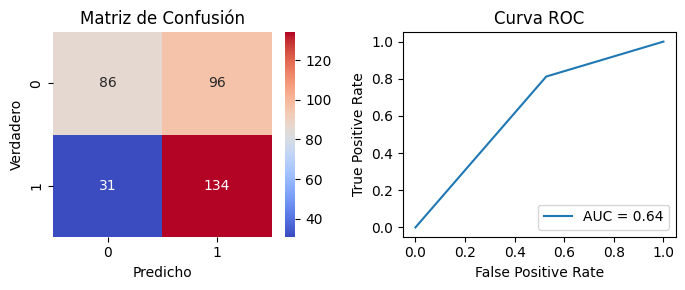

In [93]:
print('METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_grid)
#Matrix de confusion y curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc_grid = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_grid, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_grid)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

***RANDOMIZEDSEARCHCV***

In [39]:
random = GridSearchCV(modelo_grid, prm_grid,cv=3, scoring = 'accuracy', n_jobs=-1, verbose=1)
#entrenar
random.fit(X_train, y_train)
print(random.best_params_)
print(random.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'modelo__colsample_bytree': 0.8, 'modelo__learning_rate': 0.01, 'modelo__max_depth': 5, 'modelo__n_estimators': 100, 'modelo__subsample': 0.8}
0.6588462068015971


METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.74      0.47      0.58       182
           1       0.58      0.81      0.68       165

    accuracy                           0.63       347
   macro avg       0.66      0.64      0.63       347
weighted avg       0.66      0.63      0.62       347



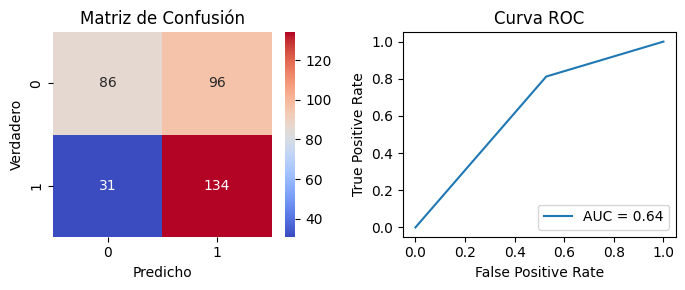

In [89]:
#USAR EL MEJOR MODLO PARA PREDECIR
mejor_rd = random.best_estimator_
y_pred_rd = mejor_rd.predict(X_test)
reporte_rd = classification_report(y_test, y_pred_rd)
matrix_rd = confusion_matrix(y_test, y_pred_rd)
print('METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_rd)
#Matrix de confusion y curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc_rd = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_rd, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_rd)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

***OPTUNA***

In [41]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


In [62]:
import optuna
from sklearn.model_selection import cross_val_score
def objetivo(valor):
  # Definir los hiperparámetros que queremos optimizar
  n_estimators = valor.suggest_categorical('modelo__n_estimators', [100, 200, 300])
  max_depth = valor.suggest_int('modelo__max_depth', 3, 7)
  learning_rate = valor.suggest_float('modelo__learning_rate', 0.01, 0.2)
  subsample = valor.suggest_float('modelo__subsample', 0.8, 1.0)
  colsample_bytree = valor.suggest_float('modelo__colsample_bytree', 0.8, 1.0)

  #Modelo de los hiperparametros
  modelo_op = Pipeline(steps=[
    ('pre', preproceso),
    ('modelo', XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
          use_label_encoder=False,  # Esto es importante en XGBClassifier para evitar warnings
          eval_metric='logloss',  # Esto es requerido para XGBClassifier en versiones recientes
          verbose=1
    ))
  ])

  #validacion cruzada para obtener la metrica que necesito
  score = cross_val_score(modelo_op, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1,verbose=1)

  return score.mean()


In [85]:
# Establecer el nivel de logging a solo errores
optuna.logging.set_verbosity(optuna.logging.CRITICAL)
#crear estudio
estudio = optuna.create_study(direction='maximize')
#optimizar
estudio.optimize(objetivo, n_trials=30)

print(estudio.best_params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

{'modelo__n_estimators': 200, 'modelo__max_depth': 3, 'modelo__learning_rate': 0.11256288664469545, 'modelo__subsample': 0.8800475500796826, 'modelo__colsample_bytree': 0.9590778470212408}


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


In [86]:
# Obtener el mejor modelo
mejor_parametro = estudio.best_params
mejor_modelo = XGBClassifier(**mejor_parametro, random_state=42)

# Entrenar el mejor modelo
mejor_modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_op = mejor_modelo.predict(X_test)  # Cambiado de mejor_modelo(X_test) a mejor_modelo.predict(X_test)

# Matriz de Confusión Optimizada
reporte_op = classification_report(y_test, y_op)
print('Matriz de Confusión Optimizada:')
print(reporte_op)
print(estudio.best_value)

Matriz de Confusión Optimizada:
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       182
           1       0.58      0.65      0.61       165

    accuracy                           0.61       347
   macro avg       0.61      0.61      0.61       347
weighted avg       0.61      0.61      0.61       347

0.6415025930515398


METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       182
           1       0.58      0.65      0.61       165

    accuracy                           0.61       347
   macro avg       0.61      0.61      0.61       347
weighted avg       0.61      0.61      0.61       347



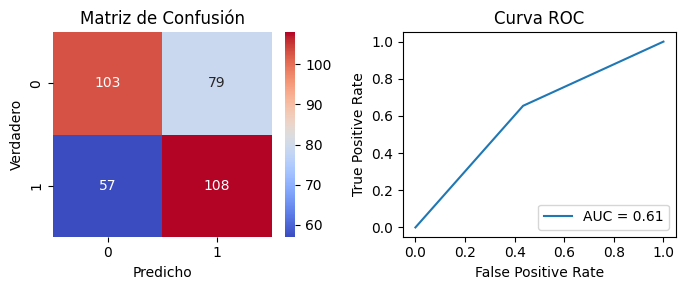

In [88]:
print('METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_op)
#Matrix de confusion y curva roc
matrix_op = confusion_matrix(y_test, y_op)
fpr, tpr, thresholds = roc_curve(y_test, y_op)
roc_auc_op = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_op, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_op)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

**CONCLUSIONES**

---


*MODELO SIN OPTIMIZAR VS MODELO OPTIMIZADO*

METRICAS DE EVALUACION MODELO XGB:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       182
           1       0.58      0.65      0.61       165

    accuracy                           0.61       347
   macro avg       0.61      0.61      0.61       347
weighted avg       0.61      0.61      0.61       347



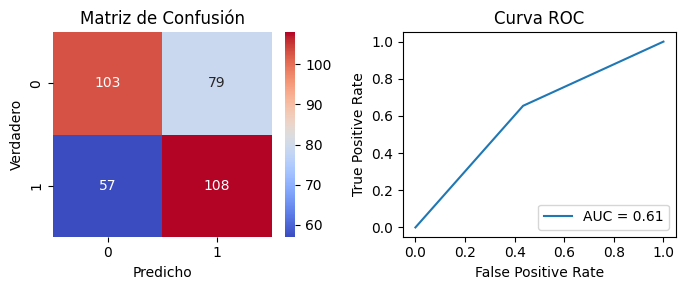



METRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:
----------------------------------

--Reporte de Clasificacion:--
              precision    recall  f1-score   support

           0       0.74      0.47      0.58       182
           1       0.58      0.81      0.68       165

    accuracy                           0.63       347
   macro avg       0.66      0.64      0.63       347
weighted avg       0.66      0.63      0.62       347



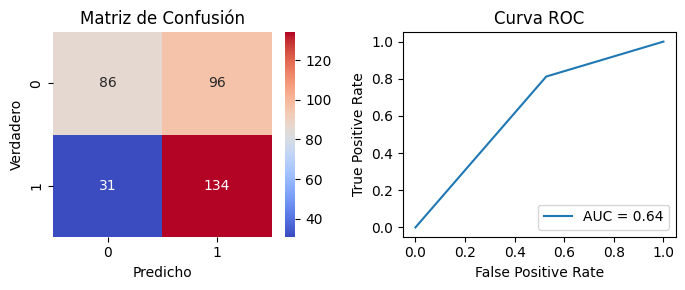


Se realiza una comparacion de modelos optimizado y sin optimizar, notandose una mejora al momento de optimizar
Se ponen a prueba 3 modelos de optimizacion, de los cuales se escoge el GRID
Concluimos con el modelo elegido XGB y el modelo de optimizacion GRID


In [97]:
#MODELO ANTES DE OPTIMIZAR
print('METRICAS DE EVALUACION MODELO XGB:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_xgb)
#Matrix de confusion y curva roc
matrix_xgb = confusion_matrix(y_test, y_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_xgb)
roc_auc = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_xgb, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

#===============================================================
#MODELO DESPUES DE OPTIMIZAR
print('\n\nMETRICAS DE EVALUACION MODELO XGB OPTIMIZADO CON OPTUNA:')
print('----------------------------------\n')
print('--Reporte de Clasificacion:--')
print(reporte_grid)
#Matrix de confusion y curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc_grid = auc(fpr, tpr)

#GRAFICOS
plt.figure(figsize=(7, 3), dpi=100)

plt.subplot(1,2,1)
sns.heatmap(matrix_grid, annot=True, cmap='coolwarm', fmt='d',)
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')

plt.subplot(1,2,2)
curva = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_grid)
curva.plot(ax=plt.gca())
plt.title('Curva ROC')

plt.tight_layout()
plt.show()

print('\nSe realiza una comparacion de modelos optimizado y sin optimizar, notandose una mejora al momento de optimizar')
print('Se ponen a prueba 3 modelos de optimizacion, de los cuales se escoge el GRID')
print('Concluimos con el modelo elegido XGB y el modelo de optimizacion GRID')